In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# from plotly.offline import iplot,plot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import re
from wordcloud import WordCloud
#init_notebook_mode(connected=True)

In [3]:
tmbd = pd.read_csv('./data/tmbd/tmbd_movies_cleaned.csv')
tmbd.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Análise por notas

In [5]:
top10_movies = tmbd.sort_values('popularity', ascending=False).head(10)

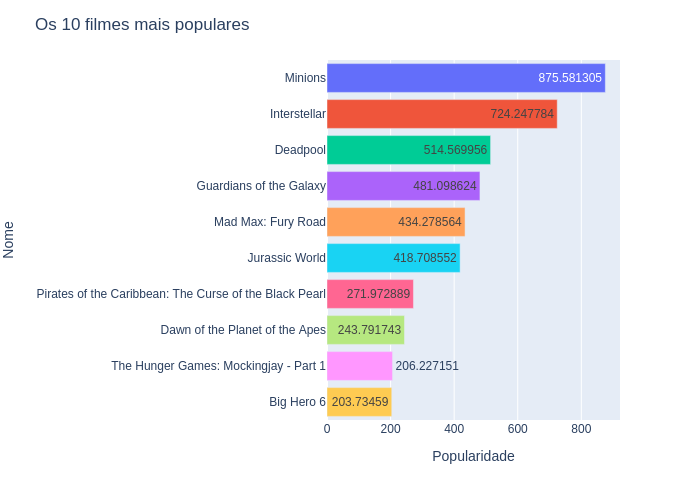

In [10]:
fig = px.bar(top10_movies, x="popularity", y="original_title", orientation="h", text="popularity", color="original_title")

fig.update_layout(
    title="Os 10 filmes mais populares",
    xaxis_title="Popularidade",
    yaxis_title="Nome",
    showlegend=False
)
fig.show('png')

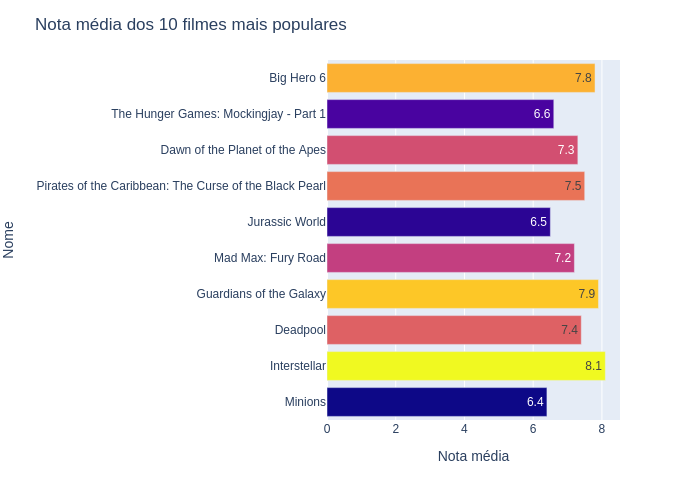

In [149]:
fig = px.bar(top10_movies, x="vote_average", y="original_title", orientation="h", text="vote_average", color="vote_average")

fig.update_layout(
    title="Nota média dos 10 filmes mais populares",
    xaxis_title="Nota média",
    yaxis_title="Nome",
    showlegend=False
)
fig.update_coloraxes(showscale=False)
fig.show('png')

In [26]:
top10_notes = tmbd.sort_values('vote_average', ascending=False)
top10_notes = top10_notes[top10_notes.vote_count>=10]

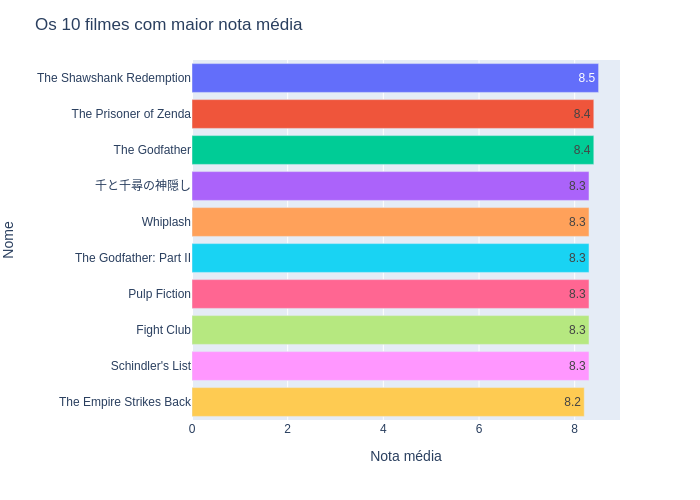

In [27]:
fig = px.bar(top10_notes.head(10), x="vote_average", y="original_title", orientation="h", text="vote_average", color="original_title")

fig.update_layout(
    title="Os 10 filmes com maior nota média",
    xaxis_title="Nota média",
    yaxis_title="Nome",
    showlegend=False
)
fig.show('png')

Podemos concluir que os filmes mais populares não necessariamente irão ter uma boa nota média

### Análise de acordo com o tempo

In [31]:
tmbd['release_date'] = pd.to_datetime(tmbd['release_date'])

In [32]:
tmbd['release_year'] = tmbd['release_date'].dt.year

In [65]:
tmbd = tmbd[tmbd.vote_count>=10]

In [66]:
noteby_year = tmbd.groupby('release_year')['vote_average'].mean().reset_index()

In [69]:
runtimeby_year = tmbd.groupby('release_year')['runtime'].mean().reset_index()

In [102]:
budgetby_year = tmbd.groupby('release_year')['budget'].mean().reset_index()

In [119]:
revenuey_year = tmbd.groupby('release_year')['revenue'].mean().reset_index()

In [109]:
sns.set_theme()

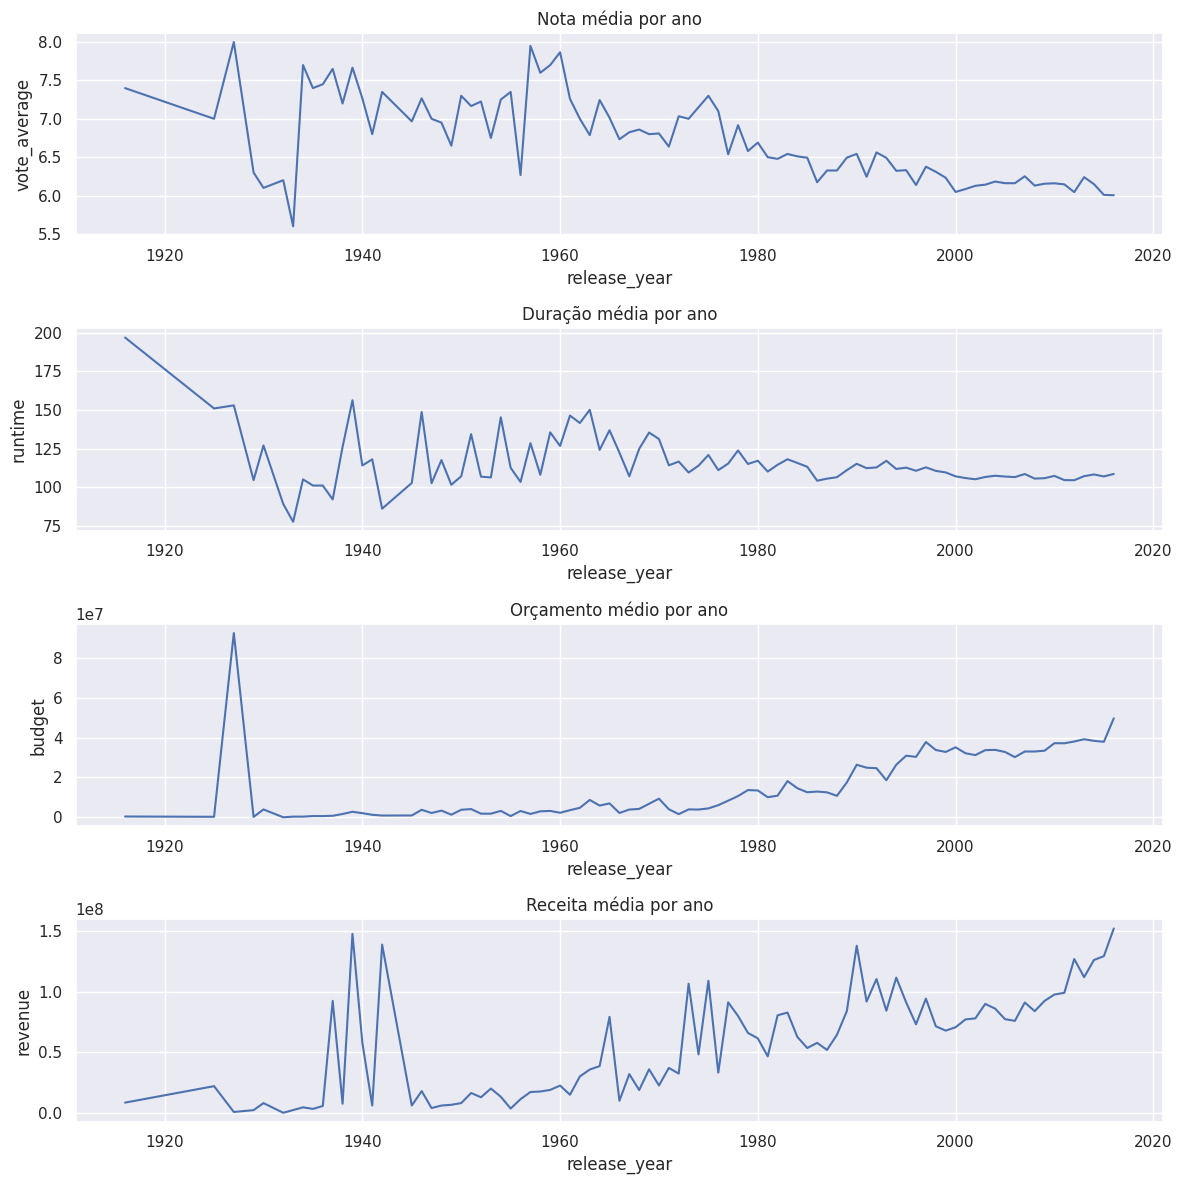

In [121]:
plt.figure(figsize=[12,12])
plt.subplot(411)
plt.title('Nota média por ano')
sns.lineplot(noteby_year, x= 'release_year', y='vote_average')
plt.subplot(412)
plt.title('Duração média por ano')
sns.lineplot(runtimeby_year, x= 'release_year', y='runtime')
plt.subplot(413)
plt.title('Orçamento médio por ano')
sns.lineplot(budgetby_year, x= 'release_year', y='budget')
plt.subplot(414)
plt.title('Receita média por ano')
sns.lineplot(revenuey_year, x= 'release_year', y='revenue')
plt.tight_layout()

- a nota média (vote average) dos filmes parece diminuir com o tempo
- a duração dos filmes (runtime) parece diminuir com o tempo
- o orçamento (budget) dos filmes aumentou com o tempo
- as receitas (revenue) dos filmes também cresceram junto com o orçamento durante os anos

### Análise de correlação

In [203]:
tmbd.corr(method='pearson').style.background_gradient(cmap='YlOrRd',axis=1)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
budget,1.000000,-0.032880,0.483968,0.723409,0.255302,0.020588,0.578944,0.193478
id,-0.032880,1.000000,0.107144,-0.005961,-0.072908,-0.106533,0.053904,0.442439
popularity,0.483968,0.107144,1.000000,0.634191,0.206627,0.284036,0.770690,0.120105
revenue,0.723409,-0.005961,0.634191,1.000000,0.246468,0.198689,0.775747,0.104375
runtime,0.255302,-0.072908,0.206627,0.246468,1.000000,0.392257,0.266744,-0.162168
vote_average,0.020588,-0.106533,0.284036,0.198689,0.392257,1.000000,0.354941,-0.208966
vote_count,0.578944,0.053904,0.770690,0.775747,0.266744,0.354941,1.000000,0.130711
release_year,0.193478,0.442439,0.120105,0.104375,-0.162168,-0.208966,0.130711,1.000000


Como já evidenciado, há uma certa correlação entre o orçamento (budget) e a receita (revenue) do filme, assim como a popularidade com a quantidade de votos. Mas, no geral, todas parecem correlações naturais, não havendo muito significado.

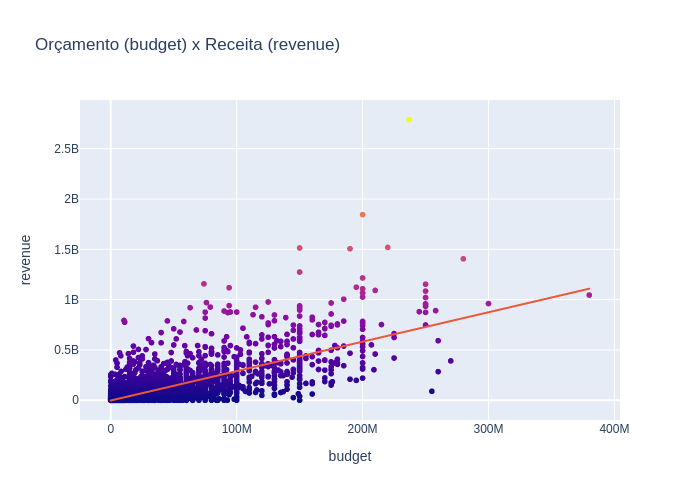

In [207]:
fig = px.scatter(tmbd, x="budget", y="revenue", color="revenue", trendline="ols", 
                 title="Orçamento (budget) x Receita (revenue)")
fig.update_coloraxes(showscale=False)
fig.show('png')

Nota que há muitos filmes com orçamentos abaixo de 100M ou 50M. Talvez isso tenha influência na linha de regressão. Podemos analisar melhor olhando a probabilidade acumulada.

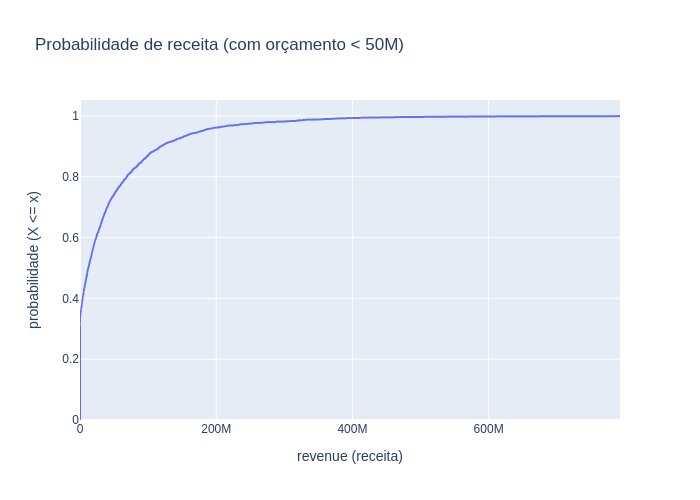

In [268]:
fig = px.ecdf(tmbd[tmbd.budget<50000000], x='revenue',title='Probabilidade de receita (com orçamento < 50M)')
fig.update_layout(
    xaxis_title="revenue (receita)",
    yaxis_title="probabilidade (X <= x)",
    showlegend=False
)
fig.show('png')

A probabilidade de se encontrar um filme com pelo menos 400M de receita é de 100%, o que significa que a probabilidade de se encontar valores acima disso é praticamente zero.

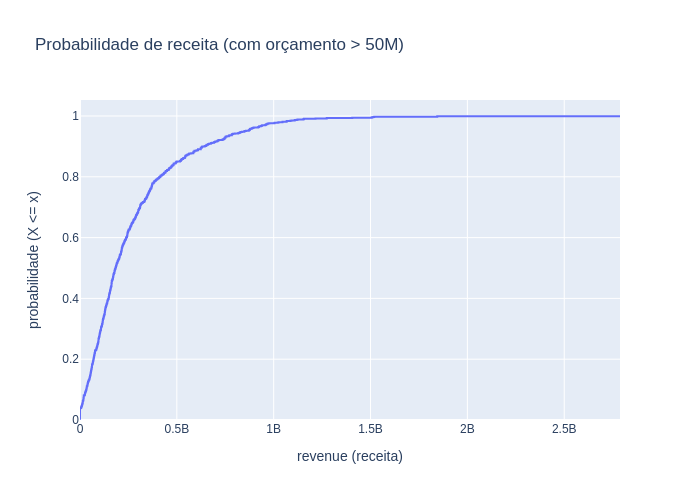

In [275]:
fig = px.ecdf(tmbd[tmbd.budget>50000000], x='revenue',title='Probabilidade de receita (com orçamento > 50M)')
fig.update_layout(
    xaxis_title="revenue (receita)",
    yaxis_title="probabilidade (X <= x)",
    showlegend=False
)
fig.show('png')

Já para os filmes com orçamento maior do que 50M, a probabilidade de se encontrar um filme com uma receita de pelo menos 400M é de aproximadamente 80%, que é o mesmo que dizer que probabilidade de uma receita acima disso é de aproxidamente 20%. Então enquanto tinhamos praticamente 0% para os filmes com orçamento < 50M, agora temos 20%.

In [269]:
tmbd[tmbd.budget>50000000][['revenue','budget']].corr(method='pearson').style.background_gradient(cmap='YlOrRd',axis=1)

,revenue,budget
revenue,1.000000,0.627407
budget,0.627407,1.000000


In [270]:
tmbd[tmbd.budget<50000000][['revenue','budget']].corr(method='pearson').style.background_gradient(cmap='YlOrRd',axis=1)

,revenue,budget
revenue,1.000000,0.415592
budget,0.415592,1.000000


Além disso, vemos que o índice de correlação entre orçamento é receita é maior para os filmes com orçamento > 50M com 0.62. Todas essas análises nos levam a crer que de fato há uma correlação significativa entre orçamento e receita.


Logicamente isso pode ser óbvio, mas como o intuito é provar o insight com uma significância estatística, tais análises foram/devem ser realizadas.